# Importing Packages & Looking into data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
data = pd.read_csv("GoSales.csv") #loading csv file

In [3]:
data.head() # head function gives us first 5 instances of the data set there is another method tail which give us last 5 instances of dataset

,GENDER,AGE,MARITAL_STATUS,PROFESSION,IS_TENT,PRODUCT_LINE,PURCHASE_AMOUNT
0,M,27,Single,Professional,True,Camping Equipment,144.78
1,F,39,Married,Other,False,Outdoor Protection,144.83
2,F,39,Married,Other,False,Outdoor Protection,137.37
3,F,56,Unspecified,Hospitality,False,Personal Accessories,92.61
4,M,45,Married,Retired,False,Golf Equipment,119.04


# Pre-Processing

In [4]:
data.isna().sum() #isna() function tell us if there are any null values in our data set

GENDER             0
AGE                0
MARITAL_STATUS     0
PROFESSION         0
IS_TENT            0
PRODUCT_LINE       0
PURCHASE_AMOUNT    0
dtype: int64

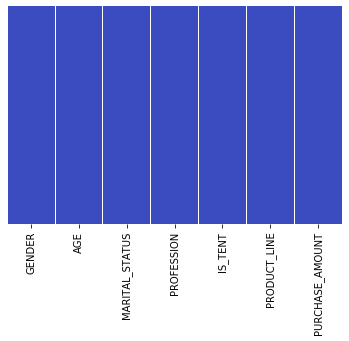

In [5]:
sns.heatmap(data.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False) #This is another way of visually determine if there is any null values in each attribute

In [5]:
data.PURCHASE_AMOUNT = data.PURCHASE_AMOUNT.astype(int) #changing data type of Purchase_amount to integer

In [6]:
data = pd.DataFrame(data) #converting into dataframe

In [7]:
#Converting strings to integer
data = data.replace({'M' : 1})
data = data.replace({'F' :0})
data = data.replace({'Single' :0})
data = data.replace({'Married' :1})
data = data.replace({'Unspecified' :2})
data = data.replace({'Professional':0})
data = data.replace({'Other':1})
data = data.replace({'Hospitality':2})
data = data.replace({'Retired':3})
data = data.replace({'Retail':4})
data = data.replace({'Sales':5})
data = data.replace({'Trades':6})
data = data.replace({'Student':7})
data = data.replace({'Executive':8})
data = data.replace({True:1})
data = data.replace({False:0})
data = data.replace({'Camping Equipment':0})
data = data.replace({'Outdoor Protection':1})
data = data.replace({'Personal Accessories':2})
data = data.replace({'Golf Equipment':3})
data = data.replace({'Mountaineering Equipment':4})




In [8]:
data.tail()

,GENDER,AGE,MARITAL_STATUS,PROFESSION,IS_TENT,PRODUCT_LINE,PURCHASE_AMOUNT
60247,1,24,0,0,1,2,126.66
60248,1,24,0,0,1,2,133.97
60249,0,27,1,4,0,0,106.15
60250,0,20,0,1,0,2,98.34
60251,0,37,1,1,0,1,137.25


# EDA
1. Using Metrics

In [9]:
data.info() #info methods helps us to give insight about the structure of data like how many atttributes. instance, data type of each instance and if there is any null value ot not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60252 entries, 0 to 60251
Data columns (total 7 columns):
GENDER             60252 non-null int64
AGE                60252 non-null int64
MARITAL_STATUS     60252 non-null int64
PROFESSION         60252 non-null int64
IS_TENT            60252 non-null int64
PRODUCT_LINE       60252 non-null int64
PURCHASE_AMOUNT    60252 non-null float64
dtypes: float64(1), int64(6)
memory usage: 3.2 MB


In [10]:
data.describe() #Define is used to gt different statistics about the data like Mean, Standard deviation etc.

,GENDER,AGE,MARITAL_STATUS,PROFESSION,IS_TENT,PRODUCT_LINE,PURCHASE_AMOUNT
count,60252.000000,60252.000000,60252.000000,60252.000000,60252.000000,60252.000000,60252.000000
mean,0.520348,34.187479,0.674285,2.837831,0.252871,1.824952,131.104340
std,0.499590,10.105477,0.618933,2.701643,0.434661,1.290521,23.086711
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,65.000000
25%,0.000000,26.000000,0.000000,1.000000,0.000000,1.000000,113.180000
50%,1.000000,33.000000,1.000000,1.000000,0.000000,2.000000,132.310000
75%,1.000000,41.000000,1.000000,5.000000,1.000000,3.000000,148.120000
max,1.000000,69.000000,2.000000,8.000000,1.000000,4.000000,185.000000


In [11]:
data.skew() # skew() function is used to check skewness in data

GENDER            -0.081461
AGE                0.653187
MARITAL_STATUS     0.350743
PROFESSION         0.724352
IS_TENT            1.137147
PRODUCT_LINE       0.114521
PURCHASE_AMOUNT   -0.079982
dtype: float64

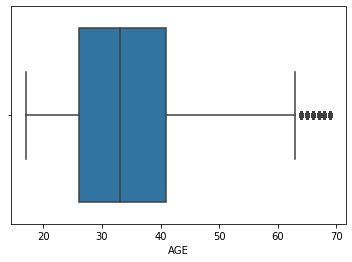

In [12]:
sns.boxplot(x=data['AGE']) #Box plot helps us to determine if there are any outliers or not 33

# EDA
2. Using Visualization

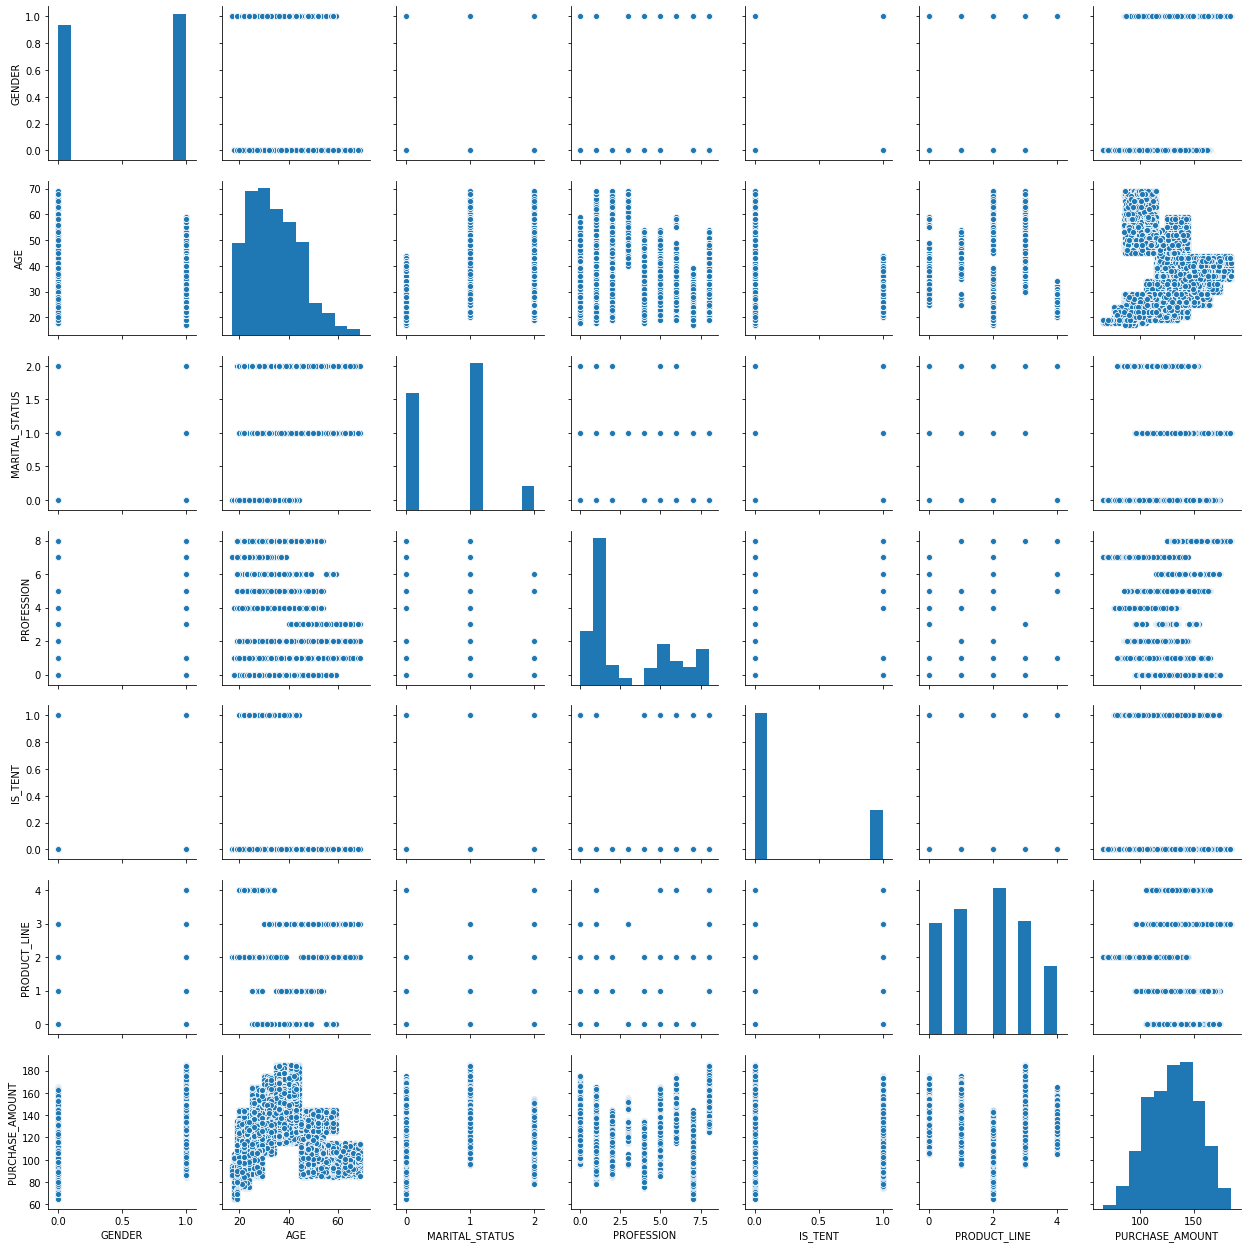

In [13]:
sns.pairplot(data) # Parplot helps to get one to one relation between all attributes in dataset

C:\Users\ISHAAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


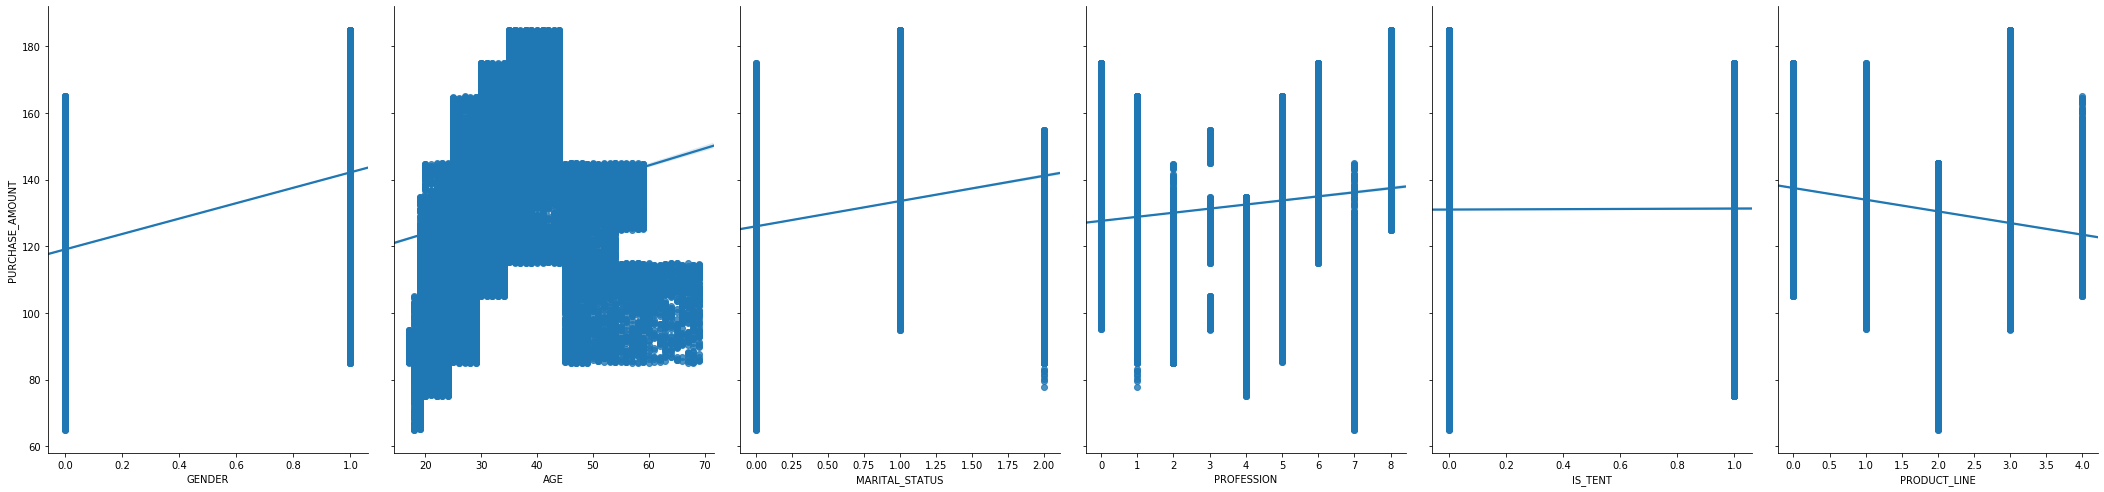

In [14]:
sns.pairplot(data, x_vars=['GENDER','AGE','MARITAL_STATUS','PROFESSION','IS_TENT','PRODUCT_LINE'], y_vars='PURCHASE_AMOUNT', size=7, aspect=0.7, kind='reg')

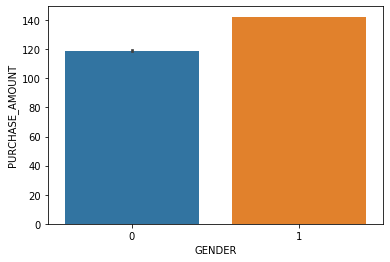

In [15]:
sns.barplot(x='GENDER',y = data.PURCHASE_AMOUNT,data=data) 

Results from barplot between Gender and Purchase amount tells us that Male(1) purchase more articles as compare to females 

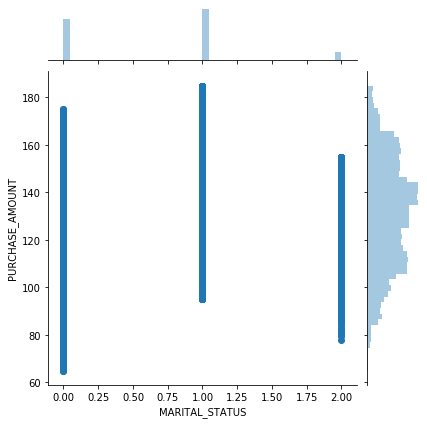

In [16]:
sns.jointplot(x = 'MARITAL_STATUS', y = 'PURCHASE_AMOUNT',data = data)

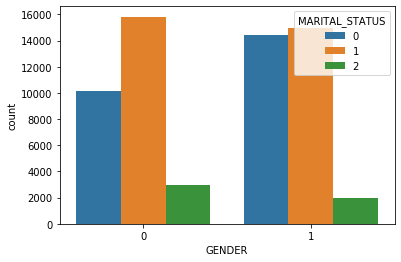

In [17]:
sns.countplot(x='GENDER',data=data,hue='MARITAL_STATUS') #countplot tells us that there are more females married than males married

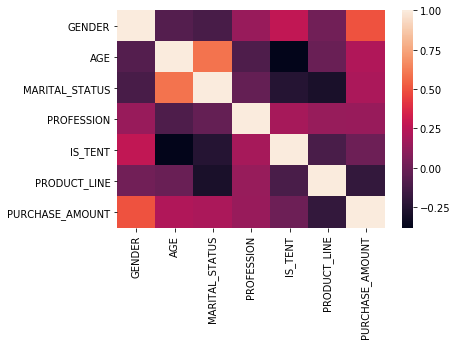

In [18]:
sns.heatmap(data.corr()) # correlation heatmap tells us how correlated attributes are to each other

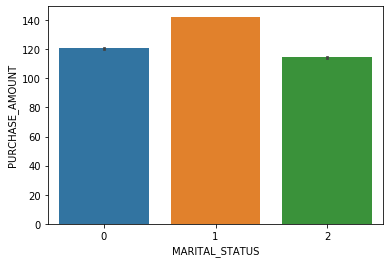

In [19]:
sns.barplot(x='MARITAL_STATUS',y = data.PURCHASE_AMOUNT,data=data)

Barplot between maritial_status and purchase amount tells us that married class purchased most as compared to other classes

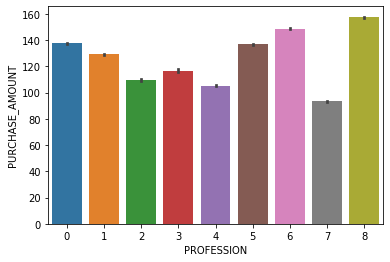

In [20]:
sns.barplot(x='PROFESSION',y = data.PURCHASE_AMOUNT,data=data)

Barplot between Profession and purchase amount tells us that executive class purchased most as compared to other classes

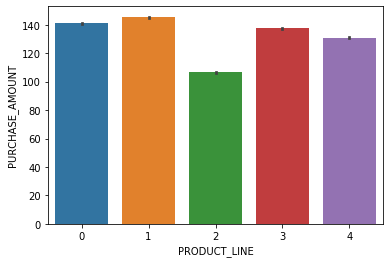

In [21]:
sns.barplot(x='PRODUCT_LINE',y = data.PURCHASE_AMOUNT,data=data)

Barplot between Product_Line and purchase amount tells us that outdoor protections class purchased most as compared to other classes

# Regression 

# Spliting the dataset into independent variables X and dependent variable y 

In [22]:
X = data.drop('PURCHASE_AMOUNT',axis =1 )


In [23]:
y = data['PURCHASE_AMOUNT']

# Feature Scaling

In [24]:
Sc = StandardScaler()

In [25]:
X = Sc.fit_transform(X)

# Spliting Data into Test and Train Data

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 123)

# Trying Several Machine Learning Classification Algorithms¶

1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Ridge
6. Lasso
7. SVR


# Function we will use to analyse algorithms
1. mse = Mean Square Error
2. mae = Mean Absolute Error
3. R2 = R-Squared Error
4. Variance

In [27]:
def analyse(y_test,predict):
    print("Mean Sqauare Error : %.2f " % mse(y_test,predict))
    print("Mean absolute error : %.2f" %mae(y_test,predict))
    print("R-Squared Error : %.2f" %r2(y_test,predict))
    print('Variance score: %.2f' % model.score(X_test, y_test))

# Linear Regression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predict = model.predict(X_test)

In [31]:
accuracies = cross_val_score(estimator = model , X = X_train,y=y_train)
round(accuracies.mean(),2)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.39

In [32]:
analyse(y_test,predict)

Mean Sqauare Error : 329.54 
Mean absolute error : 14.10
R-Squared Error : 0.38
Variance score: 0.38


# Gradient Boosting

In [37]:
model = gb()

In [38]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
predict = model.predict(X_test)

In [40]:
accuracies = cross_val_score(estimator = model , X = X_train,y=y_train)
round(accuracies.mean(),2)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.98

In [41]:
analyse(y_test,predict)

Mean Sqauare Error : 10.60 
Mean absolute error : 2.72
R-Squared Error : 0.98
Variance score: 0.98


# Ridge

In [42]:
model = Ridge(alpha = 1.0)

In [43]:
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
predict = model.predict(X_test)

In [45]:
accuracies = cross_val_score(estimator = model , X = X_train,y=y_train)
round(accuracies.mean(),2)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.39

In [46]:
analyse(y_test,predict)

Mean Sqauare Error : 329.54 
Mean absolute error : 14.10
R-Squared Error : 0.38
Variance score: 0.38


# Lasso

In [47]:
model = Lasso(alpha = 1.0)
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracies = cross_val_score(estimator = model , X = X_train,y=y_train)
print(round(accuracies.mean(),2))
analyse(y_test,predict)

0.38
Mean Sqauare Error : 335.83 
Mean absolute error : 14.44
R-Squared Error : 0.37
Variance score: 0.37


C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# SVR

In [48]:
model = SVR(gamma='scale', C=1.0, epsilon=0.2)
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(round(accuracies.mean(),2))
analyse(y_test,predict)

0.38
Mean Sqauare Error : 29.53 
Mean absolute error : 3.95
R-Squared Error : 0.94
Variance score: 0.94


# Classification

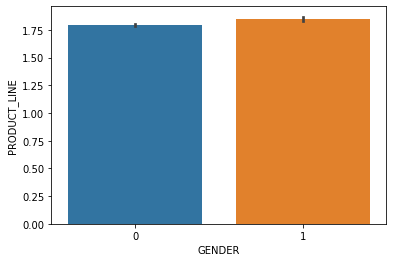

In [8]:
sns.barplot(x='GENDER',y = data.PRODUCT_LINE,data=data)

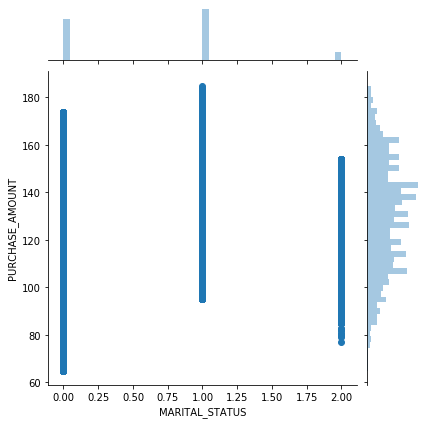

In [9]:
sns.jointplot(x = 'MARITAL_STATUS', y = 'PURCHASE_AMOUNT',data = data)

In [68]:
X = data.drop('PRODUCT_LINE',axis =1)
y = data['PRODUCT_LINE']

In [69]:
def models(X_train,y_train,X_test,y_test):
    print('Select 1 : Naive Bayes, 2: Logistic Regression, 3: Support Vector Machines, 4: Decision Tree, 5: RandomForestClassifier,6:Xtreme gradient boosting')
    mo = int(input())
    if mo == 1 :
        model = GaussianNB()
    elif mo == 2 :
        model = LogisticRegression()
    elif mo == 3 :
        model = SVC(probability = True)
    elif mo == 4 :
        model = DecisionTreeClassifier()
    elif mo == 5 :
        model = RandomForestClassifier(random_state=15325)
    elif mo == 6 :
        model = xgb.XGBClassifier()
    else :
        print('Invalid Entry')
    model.fit(X_train,y_train)
    predict= model.predict(X_test)
    print(accuracy_score(y_test,predict))
    accuracies = cross_val_score(estimator = model , X= X_train , y=y_train , cv =10)
    print(accuracies.mean())
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))
    
    
    
        

In [70]:
X = Sc.fit_transform(X)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 123)

In [83]:
models(X_train,y_train,X_test,y_test)

Select 1 : Naive Bayes, 2: Logistic Regression, 3: Support Vector Machines, 4: Decision Tree, 5: RandomForestClassifier,6:Xtreme gradient boosting
6
0.9994467802611198
Cross Validation Accuracy 0.9996444598325495
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3581
           1       1.00      1.00      1.00      3988
           2       1.00      1.00      1.00      4693
           3       1.00      1.00      1.00      3634
           4       1.00      1.00      1.00      2180

    accuracy                           1.00     18076
   macro avg       1.00      1.00      1.00     18076
weighted avg       1.00      1.00      1.00     18076

[[3581    0    0    0    0]
 [   1 3978    0    9    0]
 [   0    0 4693    0    0]
 [   0    0    0 3634    0]
 [   0    0    0    0 2180]]
